In [1]:
import pandas as pd

In [2]:
data = {
    'date': ['2021-12-01', '01-12-2022', '2022/12/01', '12-01-2021'],
    'country': ['USA', 'U.S.A.', 'America', 'United States'],
    'name': ['Aammar', 'Amaar', 'Hamza', 'Hazma'],
    'sales_2020': [100, 200, None, 200],
    'sales_2021': [None, 150, 300, 150]
}
# make pandas dataframe
df = pd.DataFrame(data)

In [3]:
df.head()

,date,country,name,sales_2020,sales_2021
0,2021-12-01,USA,Aammar,100.0,NaN
1,01-12-2022,U.S.A.,Amaar,200.0,150.0
2,2022/12/01,America,Hamza,NaN,300.0
3,12-01-2021,United States,Hazma,200.0,150.0


In [4]:
# standardizing the date format
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date'] = df['date'].dt.strftime('%Y-%m-%d')
df.head()

,date,country,name,sales_2020,sales_2021
0,2021-12-01,USA,Aammar,100.0,NaN
1,NaN,U.S.A.,Amaar,200.0,150.0
2,NaN,America,Hamza,NaN,300.0
3,NaN,United States,Hazma,200.0,150.0


In [5]:
df['date'].fillna('2021-12-01', inplace=True)

In [6]:
df.head()

,date,country,name,sales_2020,sales_2021
0,2021-12-01,USA,Aammar,100.0,NaN
1,2021-12-01,U.S.A.,Amaar,200.0,150.0
2,2021-12-01,America,Hamza,NaN,300.0
3,2021-12-01,United States,Hazma,200.0,150.0


In [7]:
# Harmonizing the country names
country={'U.S.A.':'USA', 'America':'USA', 'United States':'USA'}
df['country'] = df['country'].replace(country)

In [8]:
df.head()

,date,country,name,sales_2020,sales_2021
0,2021-12-01,USA,Aammar,100.0,NaN
1,2021-12-01,USA,Amaar,200.0,150.0
2,2021-12-01,USA,Hamza,NaN,300.0
3,2021-12-01,USA,Hazma,200.0,150.0


In [9]:
df['name'].replace({'Amaar':'Aammar', 'Hazma':'Hamza'}, inplace=True)

In [10]:
df.head()

,date,country,name,sales_2020,sales_2021
0,2021-12-01,USA,Aammar,100.0,NaN
1,2021-12-01,USA,Aammar,200.0,150.0
2,2021-12-01,USA,Hamza,NaN,300.0
3,2021-12-01,USA,Hamza,200.0,150.0


In [11]:
# 5. Resolving Contradictory Data
# For demonstration, let's assume sales_2021 should always be higher than sales_2020
# We'll remove rows where this condition is not met
df = df.drop(df[df['sales_2021'] <= df['sales_2020']].index)
df.head()

,date,country,name,sales_2020,sales_2021
0,2021-12-01,USA,Aammar,100.0,NaN
2,2021-12-01,USA,Hamza,NaN,300.0


In [10]:
from sklearn.cluster import KMeans
# sample data
data = [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]
data

[[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]

In [11]:
kmean=KMeans(n_clusters=2, n_init=10)
kmean.fit(data)
label=kmean.predict(data)
label

c:\Users\ATECH\.conda\envs\python_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 1, 1, 1])

In [12]:
# Identify outliers based on cluster labels
outliers = [data[i] for i, label in enumerate(label) if label == 1]

In [13]:
outliers

[[30, 30], [31, 31], [32, 32]]

In [15]:
data = [data[i] for i, label in enumerate(label) if label == 0]
print("Data without outliers:", data)

Data without outliers: [[2, 2], [3, 3], [3, 4]]


In [20]:
import seaborn as sns
df=sns.load_dataset('titanic')

<Axes: xlabel='age'>

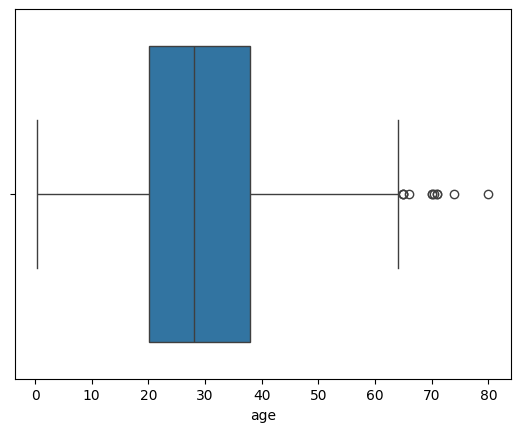

In [21]:
sns.boxplot(x='age', data=df)

In [22]:
# remove outliers using interquartile range
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['age'] < (Q1 - 1.5 * IQR)) |(df['age'] > (Q3 + 1.5 * IQR)))]

<Axes: xlabel='age'>

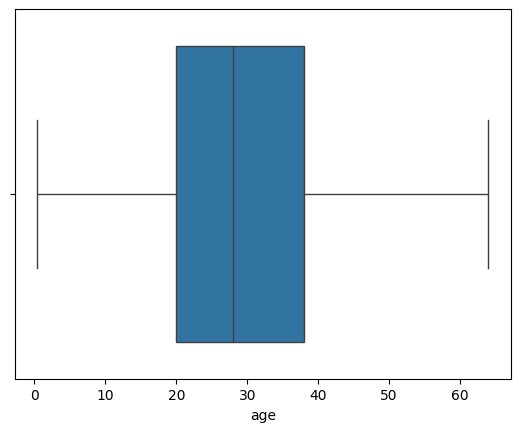

In [23]:
sns.boxplot(x='age', data=df)